In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math
import os
import time

import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import rc

direction='out'
tickout=False
mpl.rcParams.update({
    'font.family' : 'Arial', #STIXGeneral
    'mathtext.fontset' : 'stix', #stix
    'xtick.direction' : direction ,
    'ytick.direction' : direction ,
    'xtick.labelsize' : 17.5 ,
    'xtick.top' : True ,
    'xtick.major.width' : 1.5,
    'xtick.major.size' : 6,
    'ytick.labelsize' : 17.5 ,
    'ytick.right' : True ,
    'ytick.major.width' : 1.5,
    'ytick.major.size' : 6,
    'axes.labelsize' : 18,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 2,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight',
    'axes.linewidth' : 1.5,
})


In [2]:
def is_non_zero_file(fpath, verb=False, n = 11):
    result = os.path.isfile(fpath) and os.path.getsize(fpath) > 0
    if not result:
        if verb: print('No', fpath); 
    else:
        _ = np.loadtxt(fpath, dtype='float64')
        result = result and _.reshape(-1).shape[0]//10 > n
        if verb: print(_.shape)
        if not result: 
            if verb: print('No', fpath, _.shape); 
    return result
def plotacc(acc):
    for i in range(len(acc)):
        plt.plot(np.arange(9)*2+4, acc[i],'.-', label=shapes[i])
    plt.legend()
    plt.ylim(50, 100)
    plt.xlabel('x vs 20', fontsize=18)
    plt.ylabel('Accuracy', fontsize=18)
def calc_acc(vec1, vec2):
    m1 = vec1>.5
    m2 = vec2>.5
    return np.equal(m1,m2).mean()*100
def norm(a):
    return a/a.sum()

In [ ]:
state_5_n8 = np.array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]])

state_0_n8 = np.array([[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0]])

state_5 = np.array([[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]])
state_0 = np.array([[0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]])

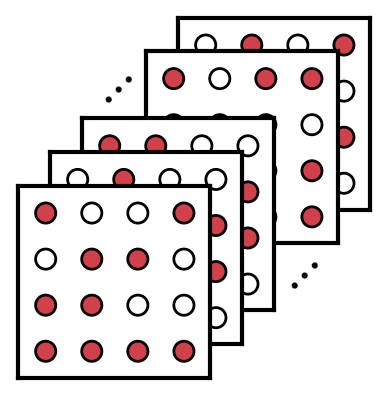

In [80]:
dx, dy = -0.05, -0.07
mpl.rcParams['axes.linewidth'] = 3

ax0 = plt.axes((-2*dx, -2*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax1 = plt.axes((-1*dx, -1*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax2 = plt.axes((+1*dx, +1*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax3 = plt.axes((+2*dx, +2*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax4 = plt.axes((+3*dx, +3*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax1.text(-0.32, 0.7, r'$\cdots$', fontsize = 35, rotation = 45, transform = ax1.transAxes)
ax1.text(0.65, -0.27, r'$\cdots$', fontsize = 35, rotation = 45, transform = ax1.transAxes)
ax = [ax0, ax1, ax2, ax3, ax4]

for i in range(5):
    ax[i].imshow(state_0[i].reshape(4,4), **{'vmax':0, 'vmin':0}, cmap='Greys')
    
    for i_j, j in enumerate(np.arange(4)*0.96):
        for i_k, k in enumerate(np.arange(4)*0.96):
            
            if state_0[i].reshape(4,4)[i_j, i_k]>0.5: 
                #ax[i].text(k+0.04,j+0.05, r'$\circ$', \
                #       fontsize=48, ha='center', va='center')
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=2) 
            else: 
                #ax[i].text(k-0.07,j+0.00, r'$\cdot$', \
                #       fontsize=95, ha='center', va='center')
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=2) 
            ax[i].add_patch(pp)
            # ax[i].text(k+0.05,j+0.1, f'{state_0[i].reshape(4,4)[i_j, i_k]:d}', \
            #            fontsize=15, color='w', ha='center', va='center')
                
plt.savefig('fig2c_1.png', dpi = 300, transparent=True)

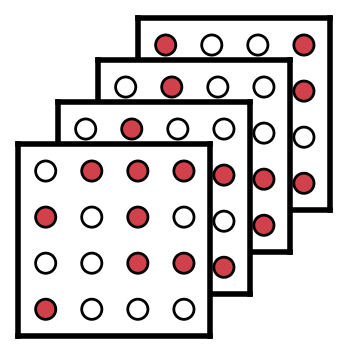

In [73]:
m = 1.25
dx, dy = -0.05*m, -0.07*m
mpl.rcParams['axes.linewidth'] = 4

ax1 = plt.axes((+0*dx, +0*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax2 = plt.axes((+1*dx, +1*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax3 = plt.axes((+2*dx, +2*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax4 = plt.axes((+3*dx, +3*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax = [ax0, ax1, ax2, ax3, ax4]

for i in range(5):
    ax[i].imshow(state_0_n8[i].reshape(4,4), **{'vmax':0, 'vmin':0}, cmap='Greys')
    
    for i_j, j in enumerate(np.arange(4)*0.96):
        for i_k, k in enumerate(np.arange(4)*0.96):
            
            if state_0_n8[i].reshape(4,4)[i_j, i_k]>0.5: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=2) 
            else: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=2) 
            ax[i].add_patch(pp)
                
plt.savefig('fig2c_11.png', dpi = 300, transparent=True)

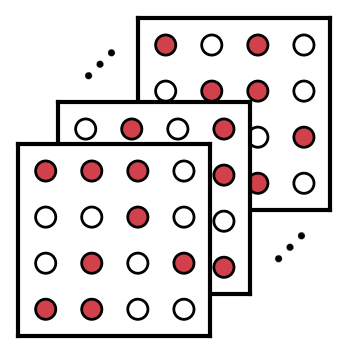

In [70]:
m = 1.25
dx, dy = -0.05*m, -0.07*m
mpl.rcParams['axes.linewidth'] = 3

ax1 = plt.axes((+0*dx, +0*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax3 = plt.axes((+2*dx, +2*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax4 = plt.axes((+3*dx, +3*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax1.text(-0.39, 0.63, r'$\cdots$', fontsize = 40, rotation = 45, transform = ax1.transAxes)
ax1.text(0.60, -0.32, r'$\cdots$', fontsize = 40, rotation = 45, transform = ax1.transAxes)
ax = [ax1, ax3, ax4]

for i in range(3):
    ax[i].imshow(state_5_n8[i+1].reshape(4,4), **{'vmax':0, 'vmin':0}, cmap='Greys')
    
    for i_j, j in enumerate(np.arange(4)*0.96):
        for i_k, k in enumerate(np.arange(4)*0.96):
            
            if state_5_n8[i+1].reshape(4,4)[i_j, i_k]>0.5: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=2) 
            else: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=2) 
            ax[i].add_patch(pp)
                
plt.savefig('fig2b_0.png', dpi = 300, transparent=True)

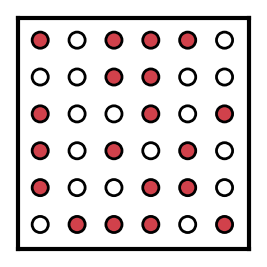

In [102]:
nr, nc = 6,6
blah = np.random.randint(0, 2, nr*nc)
ax1 = plt.axes((+0*dx, +0*dy, 0.3*6/5, 0.4*6/5), xticks = [], yticks = [], frameon = True)
ax1.imshow(blah.reshape(nr,nc), **{'vmax':0, 'vmin':0}, cmap='Greys')
for i_j, j in enumerate(np.arange(nr)*0.96):
    for i_k, k in enumerate(np.arange(nc)*0.96):

        if blah.reshape(nr,nc)[i_j, i_k]>0.5: 
            pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=2) 
        else: 
            pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=2) 
        ax1.add_patch(pp)
plt.show()

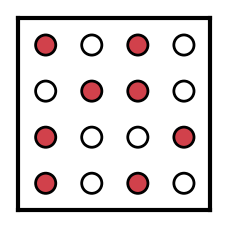

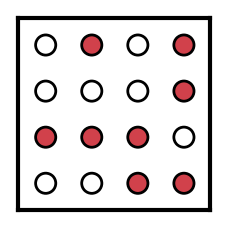

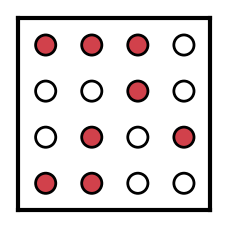

In [74]:
m = 1.25
dx, dy = -0.05*m, -0.07*m
mpl.rcParams['axes.linewidth'] = 3

state = np.array([0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0])
for i in range(1,4):
    ax1 = plt.axes((+0*dx, +0*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
    ax1.imshow(state.reshape(4,4), **{'vmax':0, 'vmin':0}, cmap='Greys')
    for i_j, j in enumerate(np.arange(4)*0.96):
        for i_k, k in enumerate(np.arange(4)*0.96):

            if state_5_n8[i].reshape(4,4)[i_j, i_k]>0.5: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=2) 
            else: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=2) 
            ax1.add_patch(pp)
    plt.savefig(f'fig2b_{i}.png', dpi=300, transparent=True)
    plt.show()

# plt.savefig('fig2c_1.png', dpi = 300, transparent=True)

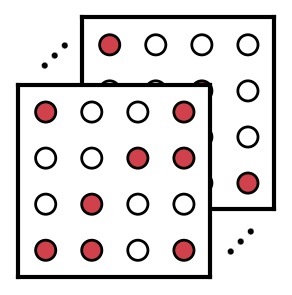

In [15]:
dx, dy = -0.05, -0.07
ax1 = plt.axes((-1*dx, -1*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax2 = plt.axes((+1*dx, +1*dy, 0.3, 0.4), xticks = [], yticks = [], frameon = True)
ax1.text(-0.32, 0.7, r'$\cdots$', fontsize = 35, rotation = 45, transform = ax1.transAxes)
ax1.text(0.65, -0.27, r'$\cdots$', fontsize = 35, rotation = 45, transform = ax1.transAxes)
ax = [ax1, ax2]

for i in range(2):
    ax[i].imshow(state_0_n8[i].reshape(4,4), **{'vmax':0, 'vmin':0}, cmap='Greys')
    
    for i_j, j in enumerate(np.arange(4)*0.96):
        for i_k, k in enumerate(np.arange(4)*0.96):
            
            if state_0_n8[i].reshape(4,4)[i_j, i_k]>0.5: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=2) 
            else: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=2) 
            ax[i].add_patch(pp)
                
# plt.savefig('fig2c_2.png', dpi = 300, transparent=True)

In [5]:
rqc_36_8_1 = np.array([[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]])
rqc_36_8_2 = np.array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]])

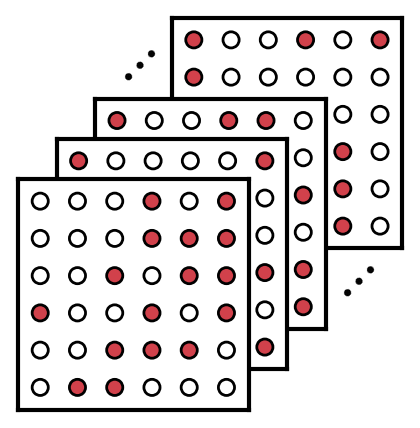

In [7]:
m = 1.2
dx, dy = -0.05*m, -0.07*m
mpl.rcParams['axes.linewidth'] = 3

ax1 = plt.axes((-1*dx, -1*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True)
ax2 = plt.axes((+1*dx, +1*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True)
ax3 = plt.axes((+2*dx, +2*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True)
ax4 = plt.axes((+3*dx, +3*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True)
ax1.text(-0.3, 0.69, r'$\cdots$', fontsize = 40, rotation = 45, transform = ax1.transAxes)
ax1.text(0.65, -0.25, r'$\cdots$', fontsize = 40, rotation = 45, transform = ax1.transAxes)
ax = [ax1, ax2, ax3, ax4]
for i in range(4):
    ax[i].imshow(rqc_36_8_2[i].reshape(6,6), **{'vmax':0, 'vmin':0}, cmap='Greys')

    for i_j, j in enumerate(np.arange(6)*0.97):
        for i_k, k in enumerate(np.arange(6)*0.97):
            
            if rqc_36_8_2[i].reshape(6,6)[i_j, i_k]>0.5: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=2) 
            else: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=2) 
            ax[i].add_patch(pp)
plt.savefig('fig1a_1.png', dpi = 300, transparent=True)

/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_9448/1915209604.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'fig1b_{h+1}.png', dpi = 300, transparent = True, bbox_to_inches='tight')


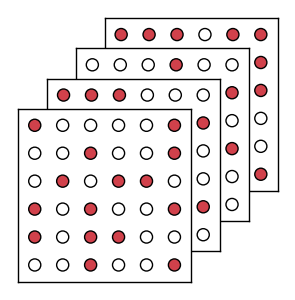

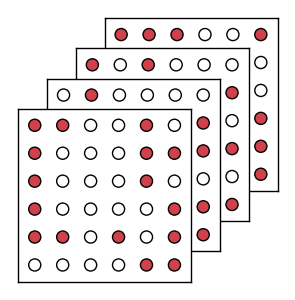

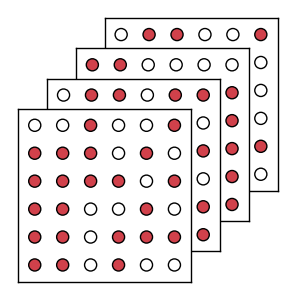

In [8]:
m = 0.9
dx, dy = -0.05*m, -0.07*m
mpl.rcParams['axes.linewidth'] = 1



for h in range(3):
#     if h!=1: continue
    ax0 = plt.axes((0*dx, 0*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True)
    ax1 = plt.axes((1*dx, 1*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True)
    ax2 = plt.axes((2*dx, 2*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True)
    ax3 = plt.axes((3*dx, 3*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True)
    ax = [ax0, ax1, ax2, ax3]
    for i in range(4):
        ax[i].imshow(rqc_36_8_1[h*4+i].reshape(6,6), **{'vmax':0, 'vmin':0}, cmap='Greys')

        for i_j, j in enumerate(np.arange(6)*0.97):
            for i_k, k in enumerate(np.arange(6)*0.97):
                if rqc_36_8_1[h*4+i].reshape(6,6)[i_j, i_k]>0.5: 
                    pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=1) 
                else: 
                    pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=1) 
                ax[i].add_patch(pp)
    plt.savefig(f'fig1b_{h+1}.png', dpi = 300, transparent = True, bbox_to_inches='tight')
    plt.show()
# plt.savefig('fig2c_1.png', dpi = 400)

/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_10352/3907904360.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'fig1b_4.png', dpi = 300, transparent = True, bbox_to_inches='tight')


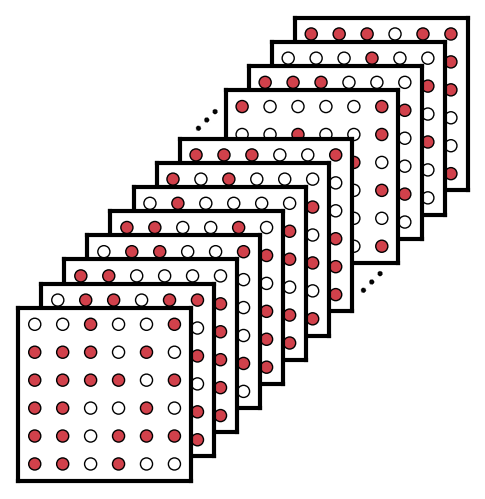

In [16]:
m = 0.9
dx, dy = -0.05*m*0.8, -0.07*m*0.8
mpl.rcParams['axes.linewidth'] = 3


ax = []

for i in range (4):
    ax.append(plt.axes((i*dx, i*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True))
for i in range (5,13):
    ax.append(plt.axes((i*dx, i*dy, 0.3*m, 0.4*m), xticks = [], yticks = [], frameon = True))
ax[3].text(-0.26, 0.73, r'$\cdots$', fontsize = 29, rotation = 45, transform = ax[3].transAxes)
ax[3].text(0.69, -0.21, r'$\cdots$', fontsize = 29, rotation = 45, transform = ax[3].transAxes)

for i in range(12):
    ax[i].imshow(rqc_36_8_1[i].reshape(6,6), **{'vmax':0, 'vmin':0}, cmap='Greys')
    for i_j, j in enumerate(np.arange(6)*0.97):
        for i_k, k in enumerate(np.arange(6)*0.97):
            if rqc_36_8_1[i].reshape(6,6)[i_j, i_k]>0.5: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#d1414b', ec='k', lw=1) 
            else: 
                pp = plt.Circle((k+0.07,j+0.07), 0.21, color='#ffffff', ec='k', lw=1) 
            ax[i].add_patch(pp)
plt.savefig(f'fig1b_4.png', dpi = 300, transparent = True, bbox_to_inches='tight')
# plt.savefig('fig2c_1.png', dpi = 400)